# Problem Set 3, due February 10 at 11:59am (i.e., noon).

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [79]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [80]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [81]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape
# uncomment the following if you want to see a lengthy description of the dataset
print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506L, 13L)
(506L,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      ind

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


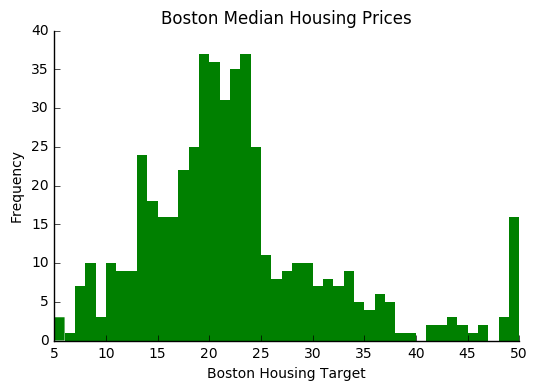

In [82]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
ax = plt.subplot(111)
ax.tick_params(top='off', right='off')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title('Boston Median Housing Prices')
plt.xlabel('Boston Housing Target')
plt.ylabel('Frequency')
plt.hist(bdata.target, color='green', bins=45, edgecolor = "none")
ax.tick_params(labeltop='off', labelright='off')
plt.show()

#todo ask about question #2

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


In [83]:
#convert to a dataframe 
bdata_df = pd.DataFrame(bdata.data, columns=bdata.feature_names)
# descriptions
print(bdata_df.describe())
bdata_df['MEDV'] = bdata.target
bdata_df['MEDV'] = bdata_df['MEDV'].where(pd.notnull(bdata_df['MEDV'])).dropna()
bdata_df['CRIM'] = bdata_df['CRIM'].where(pd.notnull(bdata_df['CRIM'])).dropna()


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

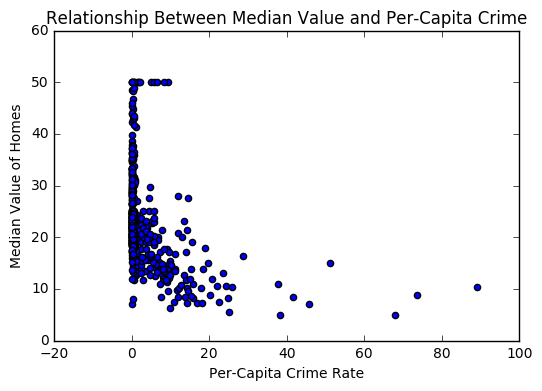

In [84]:
# enter your code below
Y = bdata_df['MEDV']
X = bdata_df['CRIM']

plt.title('Relationship Between Median Value and Per-Capita Crime')
plt.xlabel('Per-Capita Crime Rate')
plt.ylabel('Median Value of Homes')
plt.scatter(X, Y)
plt.show()

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

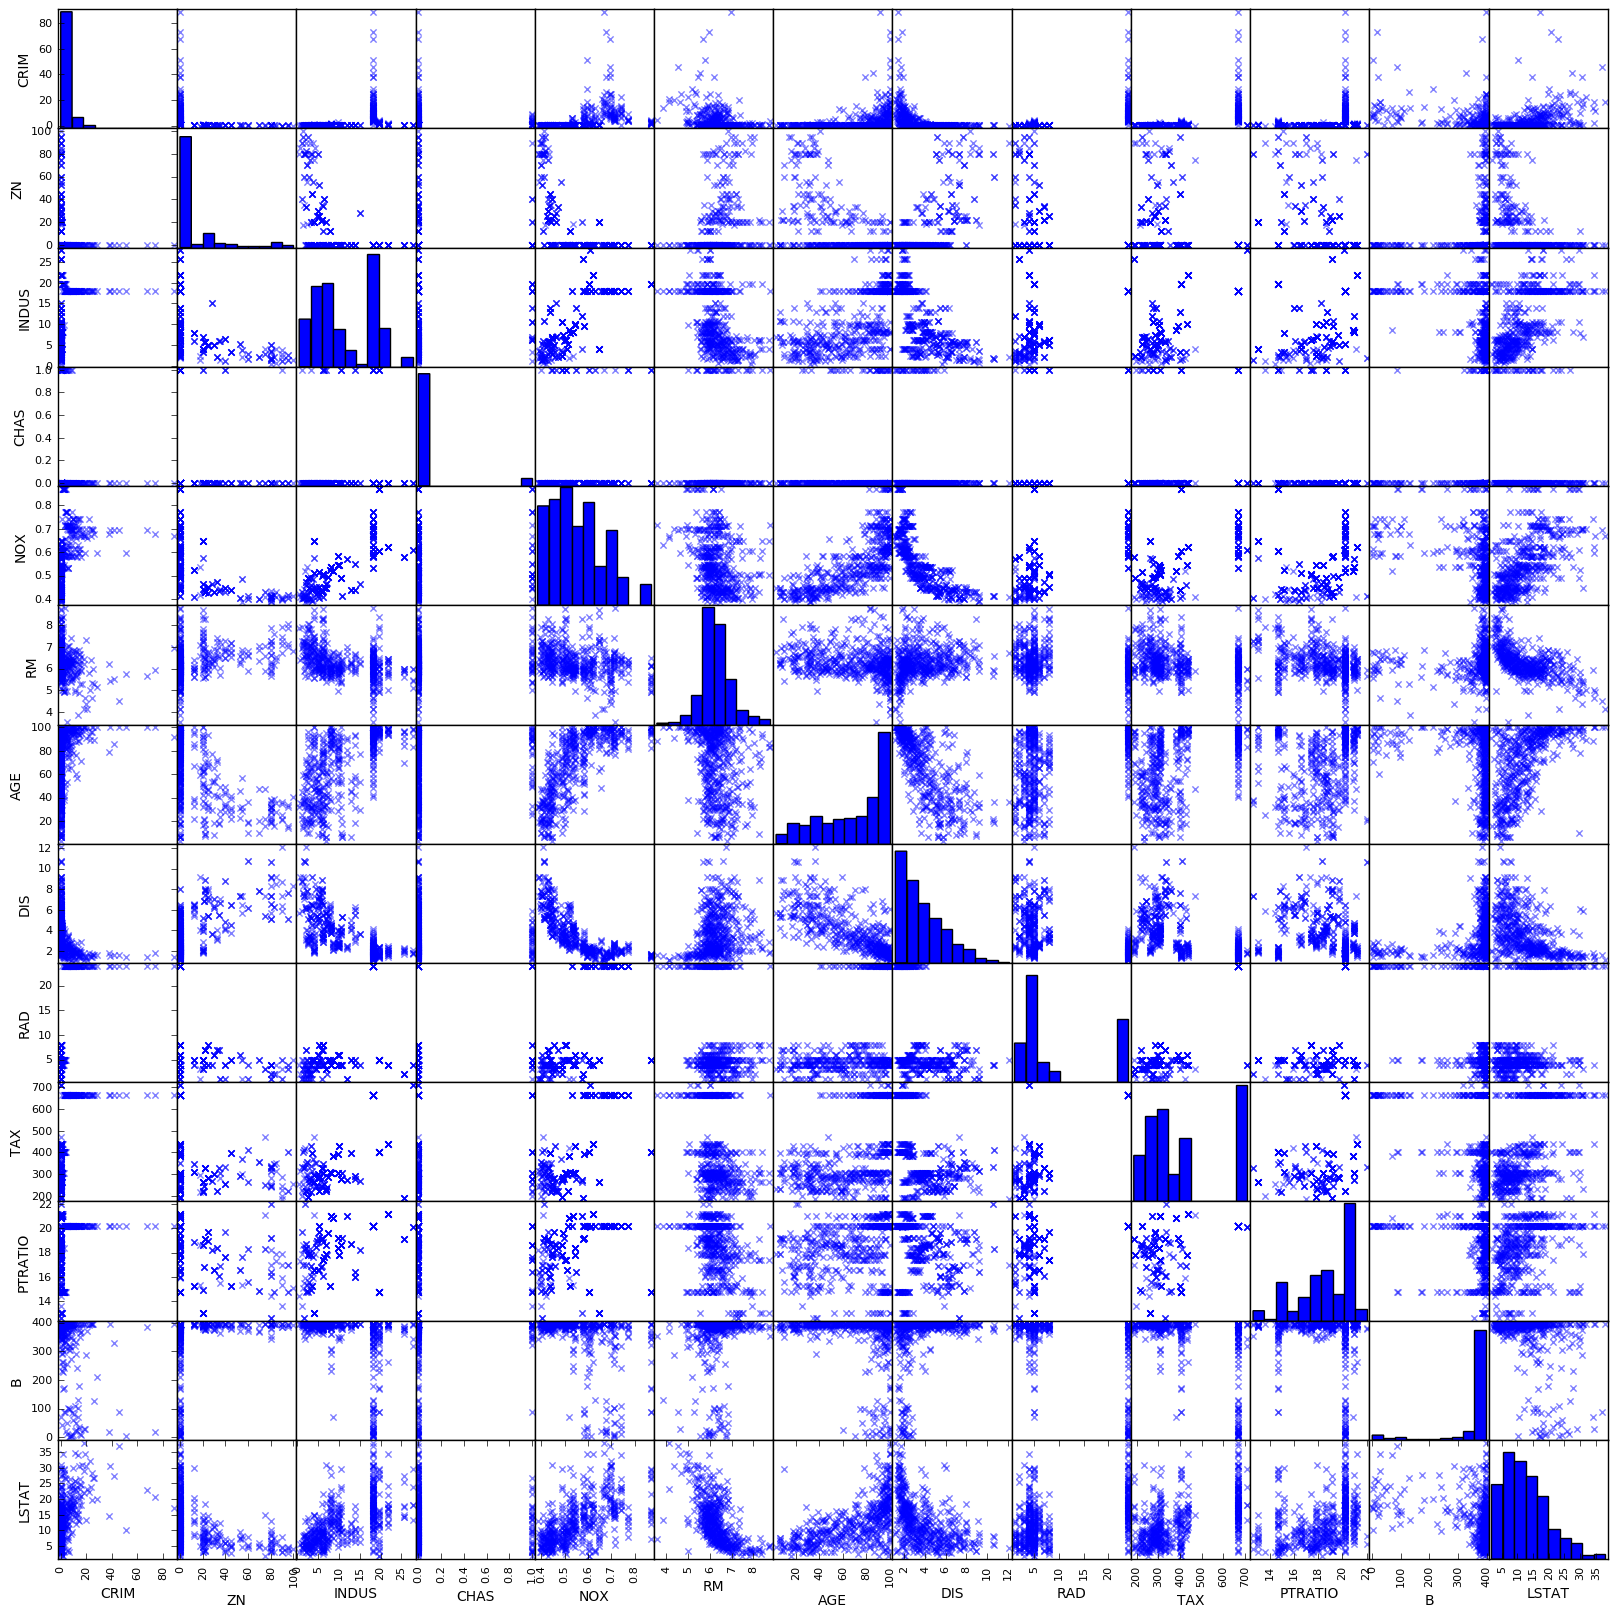

In [85]:
bdata_df = pd.DataFrame(bdata.data, columns=bdata.feature_names)
# using scatter matrix to show correlation between the 
axes = pd.tools.plotting.scatter_matrix(bdata_df, figsize=[20,20],marker='x')


The matrix above shows relationships that exist between the variables. For instance, there is a strong negative correlation between age amd lsat. Below I create two scattered grapsh showing the relationship between home median value and lower status of the population status (lsat)



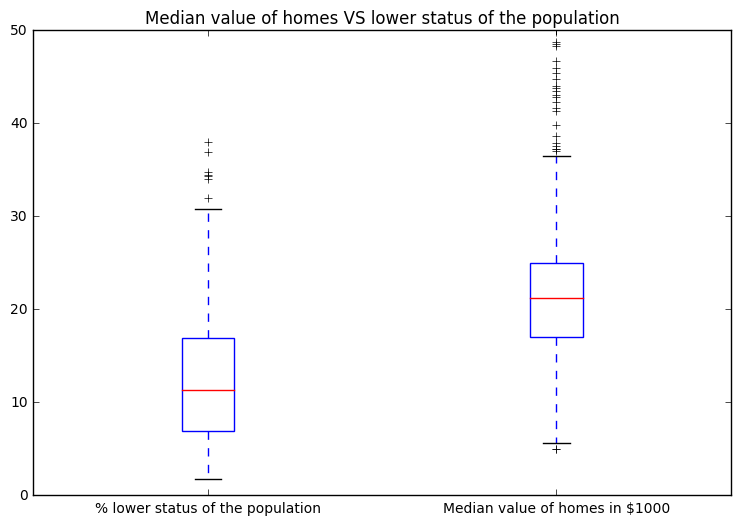

In [86]:
## combine collections of lower status of the population(LSTAT) and median home value into a list 
data_to_plot = [bdata_df.LSTAT,bdata.target]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot,patch_artist=True)

## Custom x-axis labels and graph's title 
ax.set_xticklabels(['% lower status of the population', 'Median value of homes in $1000'])
ax.set_title('Median value of homes VS lower status of the population')

plt.show()


Boxplot of a sample of 50 points. Lower status of the population seems to be skewed slightly to the right. The Median value of the homes seem to be reasonably symmetric. Both have outliers and both have different centers. 

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [87]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
# import libraries to get the mean squared error
from sklearn.metrics import mean_squared_error

def compute_rmse(predictions, yvalues):
    # taking the square root of the mean squared error 
    rmse = np.sqrt(mean_squared_error(predictions,yvalues))
    return rmse


In [88]:
print compute_rmse((2,2,3),(0,2,6))

2.08166599947


###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [89]:
bdata_df['MEDV'] = bdata.target

# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# Generate the training set.  Set random_state to be able to replicate results.
bdata_train = bdata_df.sample(frac=0.66, random_state=200)

# Select anything not in the training set and put it in the testing set.
bdata_test = bdata_df.loc[~bdata_df.index.isin(bdata_train.index)]

#get the data sets
print(bdata_train.shape)
print(bdata_test.shape)



(334, 14)
(172, 14)


###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [90]:
# Get all the columns from the dataframe.
columns = bdata_df.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["MEDV"]]

# Store the variable we'll be predicting on.
target = "MEDV"

In [91]:
#Import the linearregression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()

# Fit the model to the training data.
model.fit(bdata_train[columns], bdata_train['MEDV'].dropna())


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# Generate our predictions for the training set.
predictions = model.predict(bdata_train[columns])

# Compute error between our test predictions and the actual values.
print compute_rmse(predictions, bdata_train[target])


4.76651077066


In [120]:
# Generate our predictions for the test set.
predictions = model.predict(bdata_test[columns])

# Compute error between our test predictions and the actual values.
print compute_rmse(predictions, bdata_test[target])

4.56395671183


RMSE is done to find out how similar on average are the values between two lists. As the value changes between the two lists overtime. Ideally, you want to get an RMSE value equals to zero which means that the values between the lists are similar. 

In our example, we have found that the RMSE for the training data is slightly higher when compare to the RMSE value generated by the test data. In the best case scenario, the smaller the RMSE the better. Since the RMSE for the test set is slightly lower than that of the training set. The difference between the training data and the test data is very minimal, thus it is likely that the data will be overfitting. Basically, we have a model that tests well in sample, but has little predictive value when tested out of sample.

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [94]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
import sys

def distance(x1, x2, L):
    try:
        x1 = np.asarray(x1)
        x2 = np.asarray(x2)
        dist = np.linalg.norm(x1-x2, L)
        return dist
    except:
        e = sys.exc_info()[0]
        print(e)
 

In [95]:
print distance((3,4),(6,8),2)

5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [96]:
"""
Function
--------
nneighbor

Given  a training set, test instance, K distance and L-Norm 
returns k most similar neighbors from the training set for a given test instance
(using the already defined euclidean distance function)

Parameters
----------
trainingSet : array
    Array of training set data

testInstance : array
    Array  of test instance data
    
K: int 
predict the class of new instances

L: int
The L-norm distance between instances


Returns
-------
rmse : int and print out the time taken for the neighbor function to execute
    Root Mean Squared Error of the prediction

Example
-------
>>> print neighbor(trainingSet, testInstance, 1,2)
Time taken: 0.69 seconds
18.626078672057478
"""
# import libraries to get the mean squared error
from collections import Counter
import operator
import time
def nneighbor(trainingSet, testInstance, k, L):
    start_time = time.time()
    #your code here
    predictions = []
    for x in range(len(testInstance)):
        neighbors = getneighbor(trainingSet,testInstance[x],k, L)
        topVote = getMajorityVote(neighbors)
        predictions.append(topVote)

    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return compute_rmse(predictions, bdata_test["MEDV"])

#given a training set and a test instance, use distance to calculate the Euclidean distance
def getneighbor(trainingSet, testInstance, k, L):
    # create list for distances and targets
    distances = []
    neighbors = []

    for i in range(len(trainingSet)):
        # first we compute the euclidean distance
        dist = distance(testInstance, trainingSet[i], L) 
        #store the trainingSet and the distance
        distances.append((trainingSet[i], dist))

    # sort the list
    distances.sort(key=operator.itemgetter(1))

    # make a list of the k neighbors' targets
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

#given an array of nearest neighbours for a test case, tally up their classes to vote on test case class
def getMajorityVote(neighbors):
    # index 1 is the class
    classes = [neighbor[1] for neighbor in neighbors]
    count = Counter(classes)
    return count.most_common()[0][0] 
        


In [134]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# Generate the training set.  Set random_state to be able to replicate results.
bdata_train = bdata_df.sample(frac=0.66, random_state=200)

# Select anything not in the training set and put it in the testing set.
bdata_test = bdata_df.loc[~bdata_df.index.isin(bdata_train.index)]

trainingSet =np.array(bdata_train[["CRIM", "RM"]].dropna())
testInstance =np.array(bdata_test[["CRIM", "RM"]].dropna())

#test the function with k = 1, L = 2
nneighbor(trainingSet, testInstance,1,2)


Time taken: 0.57 seconds


18.626078672057478

###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [140]:
"""
Function
--------
normalize

Given an array of values

Parameters
----------
raw_data : array
    Array of numerical values 


Returns
-------
normalized data : a list of normalized data
    subtract the mean and divide by the standard deviation

Example
-------
>>> normalize(trainingSet)
[  -0.77202001,   -1.02401001,    4.75898999,   71.67598999,
           3.33088999,  275.97598999]
"""
def normalize(raw_data):
    
    normalized_data=[] # use to store the normalized data
    store_data =[] # use to store the data - mean squared
    mean = np.mean(raw_data) # get the mean of the data_set

    for i in raw_data:
        n = np.square(i-mean)
        store_data.append(n)
    #find the standard deviation
    std = np.std(store_data) # standard deviation of 
    #normalize the attributes
    for y in raw_data:
        x = y-mean/std
        normalized_data.append(x)
    return normalized_data



In [141]:
trainingSetNormalize = normalize(trainingSet)
testSetNormalize = normalize(testInstance)
nneighbor(trainingSetNormalize, testSetNormalize,1,2)

Time taken: 0.43 seconds


24.327740633814088

The RMSE in the normalize case tends to be higher than the non-normalize option. Ideally, the lower the RMSE the better, however for a large data sets, the normalize option will give a better estimation on the bias-variance as we change our model based on the K-fold. For a small data set, this difference between normalize and non-normalize is not much a big deal, but it becomes more importan when we have a large data sets. 

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [101]:
#Generated correlation matrix that shows how the features are related to each other. 
bdata_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [144]:
# model using different set of 2 features that have strong relationships between each other but not necessarily with MEDV

#creating a seed to allow for the same data to be generated
np.random.seed(seed=13579)

# Generate the training set.  Set random_state to be able to replicate results.
bdata_train = bdata_df.sample(frac=0.66, random_state=200)

# Select anything not in the training set and put it in the testing set.
bdata_test = bdata_df.loc[~bdata_df.index.isin(bdata_train.index)]

# filter data for INDUS and NOX features for both training and testinstance
trainingSetTwoFeatures =np.array(bdata_train[["INDUS", "NOX"]].dropna())
testInstanceTwoFeatures =np.array(bdata_test[["INDUS", "NOX"]].dropna())

#calculating RMSE and runtime to caculate the Nearest Neighbors
nneighbor(trainingSetTwoFeatures, testInstanceTwoFeatures,1,2)

Time taken: 0.69 seconds


24.136667429264758

In [103]:
#model using more than 4 features 
#Selecting 4 features that have either strong or negative correllation with MEDV:RM,LSTAT,PTRATIO,TAX

#creating a seed to allow for the same data to be generated
np.random.seed(seed=13579)

# Generate the training set.  Set random_state to be able to replicate results.
bdata_train = bdata_df.sample(frac=0.66, random_state=200)

# Select anything not in the training set and put it in the testing set.
bdata_test = bdata_df.loc[~bdata_df.index.isin(bdata_train.index)]

# filter data for RM,LSTAT, PTRATIO, and TAX features for both training and testinstance
trainingSetFourFeatures =np.array(bdata_train[["RM", "LSTAT", "PTRATIO", "TAX"]].dropna())
testInstanceFourFeatures =np.array(bdata_test[["RM", "LSTAT", "PTRATIO", "TAX"]].dropna())


#calculating RMSE and runtime to caculate the Nearest Neighbors
nneighbor(trainingSetFourFeatures, testInstanceFourFeatures,1,2)


Time taken: 0.67 seconds


18.105290053102625

In [104]:
#using different L values 

#creating a seed to allow for the same data to be generated
np.random.seed(seed=13579)

# Generate the training set.  Set random_state to be able to replicate results.
bdata_train = bdata_df.sample(frac=0.66, random_state=200)

# Select anything not in the training set and put it in the testing set.
bdata_test = bdata_df.loc[~bdata_df.index.isin(bdata_train.index)]

# filter data for RM,LSTAT, PTRATIO, and TAX features for both training and testinstance
trainingSetDifferentLNorms =np.array(bdata_train[["RM","LSTAT", "PTRATIO"]].dropna())
testInstanceSetDifferentLNorms =np.array(bdata_test[["RM","LSTAT", "PTRATIO"]].dropna())

#calculating RMSE and runtime to caculate the nearest neibhor for l = 3
nneighbor(trainingSetDifferentLNorms, testInstanceSetDifferentLNorms,1,3)


Time taken: 1.27 seconds


18.167973786628707

In [105]:
#calculating RMSE and runtime to caculate the nearest neibhor for l = 5
nneighbor(trainingSetDifferentLNorms, testInstanceSetDifferentLNorms,1,5)

Time taken: 1.41 seconds


18.140017900173213

In [106]:
#calculating RMSE and runtime to caculate the nearest neibhor for L = 7
nneighbor(trainingSetDifferentLNorms, testInstanceSetDifferentLNorms,1,7)

Time taken: 1.62 seconds


18.132864693057854

*enter your observations here*

We noticed that as L-Norm increases the RMSE tends to decrease using the same K-nearest neighboor value. Also, the more correlated the features are from MDEV, the lower the RMSE value. 
To summarize the result is as follows:
   - RMSE decreases from 18.16 to 18.13 as L-NORM increases from 3 to 7
   - Features that have strong(positive or negative) correlation with MEDV like RM, LSTA and PRATIO tend to have a lower RMSE
   - Features that have litle correlation with MEDV like INDUS tend to have a higher RMSE 
   

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [107]:
"""
Function
--------
getkFoldCrossValidation

Generates K (trainingSet, validation) pairs from the items in training.

Parameters
----------
training : array
    Array of training set data

num_folds : int
    number of folds

Returns
-------
tratiningSet : array of training data set
testInstance: array of validation data
Example
-------
>>> getkFoldCrossValidation(trainingSet, 10)
taininingSet:[array([ 1.70127322,  4.52659322]), array([-0.53379678,  5.39159322]), array([ 3.47698322,  5.05759322]),
              [array([ 1.70127322,  4.52659322]), array([-0.53379678,  5.39159322]), array([ 3.47698322,  5.05759322])
              [array([ 1.70127322,  4.52659322]), array([-0.53379678,  5.39159322]), array([ 3.47698322,  5.05759322])]
              
testInstance: [array([ 1.70127322,  4.52659322]), array([-0.53379678,  5.39159322]), array([ 3.47698322,  5.05759322])]
"""
def getkFoldCrossValidation(training, num_folds):
    subset = len(training)/num_folds
    for i in range(num_folds):
        testInstance = training[i*subset:][:subset]
        trainingSet = training[:i*subset] + training[(i+1)*subset:]
        yield trainingSet, testInstance

 

In [108]:
#storing rmse values
rmse_store =[]
#creating a seed to allow for the same data to be generated
np.random.seed(seed=13579)

# Generate the training set.  Set random_state to be able to replicate results.
bdata_train = bdata_df.sample(frac=0.66, random_state=200)

# Select anything not in the training set and put it in the testing set.
bdata_test = bdata_df.loc[~bdata_df.index.isin(bdata_train.index)]

training  = np.array(bdata_train[["CRIM", "RM"]].dropna())
testInstance =np.array(bdata_test[["CRIM", "RM"]].dropna())

#normalize the training data
training = normalize(training)
testInstance = normalize(testInstance)

#get training set and validation for a 10-fold
for trainingSet, validationSet in getkFoldCrossValidation(training,10):
    rmse = nneighbor(np.array(trainingSet), testInstance, 1,2)
    rmse_store.append(rmse)
    print 'rmse for k-fold is: ', rmse
    time.sleep(5)
    
print    
print 'average rmse for k-fold: ',np.mean(rmse)
  

Time taken: 0.49 seconds
rmse for k-fold is:  19.4590803064
Time taken: 0.53 seconds
rmse for k-fold is:  19.4551211478
Time taken: 0.44 seconds
rmse for k-fold is:  19.4581850867
Time taken: 0.47 seconds
rmse for k-fold is:  19.465251288
Time taken: 0.46 seconds
rmse for k-fold is:  19.4596035685
Time taken: 0.48 seconds
rmse for k-fold is:  19.459851531
Time taken: 0.47 seconds
rmse for k-fold is:  19.4566880925
Time taken: 0.47 seconds
rmse for k-fold is:  19.4586918702
Time taken: 0.49 seconds
rmse for k-fold is:  19.4634966141
Time taken: 0.46 seconds
rmse for k-fold is:  19.4574744439

average rmse for k-fold:  19.4574744439


###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [153]:
"""
Function
--------
knn

Given a training set, test instance, K distance and L-Norm 
returns k most similar neighbors from the training set for a given test instance (using the already defined euclideanDistance function)


Parameters
----------
trainingSet : array
    Array of training set data

testinstance: array
    Array of test set data
L: int
The L-norm distance between instances

K: int

Returns
-------
rmse : average rmse based on the k-fold
Print time taken for the function to execute
Example
-------
>>> knn(trainingSet, testInstance, 2,1)
Time taken: 6.2 seconds
19.4463209719
"""
import operator 
import time

def knn(trainingSet, testInstance, L, K):
    store_rmse =[]
    start_time = time.time()
    for trainingData, validationSet in getkFoldCrossValidation(trainingSet,10):      
        trainingData = np.array(trainingData)
        predictions = []
        for x in range(len(testInstance)):
            neighbors = getneighbor(trainingData,testInstance[x],K, L)
            topVote = getMajorityVote(neighbors)
            predictions.append(topVote)
        result = compute_rmse(predictions, bdata_test["MEDV"])
        store_rmse.append(result)
    rmse = np.mean(store_rmse)
    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return rmse



In [154]:
# Generate the training set.  Set random_state to be able to replicate results.
bdata_train = bdata_df.sample(frac=0.66, random_state=200)

# Select anything not in the training set and put it in the testing set.
bdata_test = bdata_df.loc[~bdata_df.index.isin(bdata_train.index)]

training  = np.array(bdata_train[["CRIM", "RM"]].dropna())
testInstance =np.array(bdata_test[["CRIM", "RM"]].dropna())

#normalize the training data and testinstance
training = normalize(training)
testInstance = normalize(testInstance)

rmse = knn(training, testInstance, 2, 3)
print 'Average rmse for K = 3 is: ', rmse

Time taken: 7.1 seconds
Average rmse for K = 3 is:  18.6564948541


###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [145]:
#graph store
graph_store = {} 
rmse_store = []

#creating a seed to allow for the same data to be generated
np.random.seed(seed=13579)

# Generate the training set.  Set random_state to be able to replicate results.
bdata_train = bdata_df.sample(frac=0.66, random_state=200)

# Select anything not in the training set and put it in the testing set.
bdata_test = bdata_df.loc[~bdata_df.index.isin(bdata_train.index)]

trainingSet  = np.array(bdata_train[["CRIM", "ZN", "RM", "AGE", "DIS", "TAX"]].dropna())
testInstance =np.array(bdata_test[["CRIM", "ZN", "RM", "AGE", "DIS", "TAX"]].dropna())

#normalize the training data
trainingSet = normalize(trainingSet)
testInstance = normalize(testInstance)

for k in range(1,26):
    rmse = knn(trainingSet, testInstance, 2, k)
    graph_store[k] = rmse
    
    

Time taken: 4.66 seconds
Time taken: 4.98 seconds
Time taken: 6.21 seconds
Time taken: 6.7 seconds
Time taken: 6.11 seconds
Time taken: 5.02 seconds
Time taken: 6.37 seconds
Time taken: 4.05 seconds
Time taken: 5.0 seconds
Time taken: 4.48 seconds
Time taken: 4.18 seconds
Time taken: 6.96 seconds
Time taken: 7.77 seconds
Time taken: 6.99 seconds
Time taken: 7.2 seconds
Time taken: 8.07 seconds
Time taken: 7.72 seconds
Time taken: 6.98 seconds
Time taken: 5.81 seconds
Time taken: 4.31 seconds
Time taken: 4.17 seconds
Time taken: 4.29 seconds
Time taken: 4.61 seconds
Time taken: 4.69 seconds
Time taken: 6.51 seconds


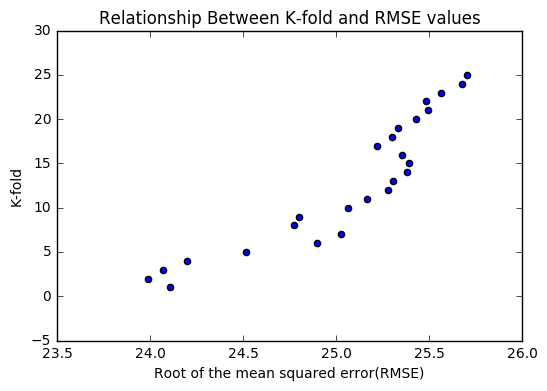

In [150]:
#plotting graph
graph_store # using the dictionary that hold the K-folds as key and the RMSE as values

import matplotlib.pyplot as plt #import the necessary libray
X = graph_store.values() # X values
Y = graph_store.keys() # Y values 
plt.scatter(X, Y) # generate the scatter plot
plt.title('Relationship Between K-fold and RMSE values')
plt.xlabel('Root of the mean squared error(RMSE)')
plt.ylabel('K-fold')
plt.show()   # show the plot



Ideally, lower value of K is more biased and thus less desirable. On the other hand, higher value of K is less biased, but can be affected by large variability. The graph(relastionship between K-fold and RMSE) established the relatioship between K-fold and RMSE using a linear equation. The plot seems to have a high error from the training data points used. In this scenario, our model fails to captuere the underlying trend of the data. 

That said, the bias in this case is the difference between what the compute_rmse estimate to be for that model and the target median home values. We have found that the RMSE tends to increase as the K-fold increases. A lower K tends to be more biased while the higher value of K tends to be less biased. It seems then fitting to choose a K=10. 